In [41]:
# REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import statsmodels.api as sma
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# csv file after initial feature engineering is imported

df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/CLEANED_DATASET1.csv")
df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age,years_of_experience,TARGET
0,2.0,270000.0,0.0,0.0,1.0,0,0,0,10,-6,6.0,0,1,0,36.0,6.0,0
1,0.0,81000.0,0.0,1.0,0.0,1,1,0,12,-4,0.0,0,0,0,49.0,1.0,0
2,0.0,270000.0,1.0,0.0,0.0,0,1,0,8,0,6.0,1,1,1,54.0,3.0,0
3,1.0,112500.0,0.0,0.0,0.0,0,0,0,3,-3,0.0,0,1,1,41.0,5.0,0
4,2.0,139500.0,0.0,0.0,0.0,1,0,0,4,-29,0.0,1,1,1,47.0,15.0,0


In [4]:
df["TARGET"].value_counts()

1    513096
0    511332
Name: TARGET, dtype: int64

In [5]:
X=df.drop("TARGET",axis=1)
y=df["TARGET"]


In [7]:
model=sma.Logit(y,sma.add_constant(X)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.659245
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:              1024428
Model:                          Logit   Df Residuals:                  1024411
Method:                           MLE   Df Model:                           16
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                 0.04891
Time:                        19:25:42   Log-Likelihood:            -6.7535e+05
converged:                       True   LL-Null:                   -7.1008e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9537      0.013    -72.828      0.000      -0.979      -0.928
CNT_CHILDREN            0.1026      0.003     31.866      0.000       0.096       0.109
AMT_INCOME_TOTAL    -1.367e-08   2.51e-08     -0.546      0.585   -6.28e-08    3.54e-08
NAME_EDUCATION_TYPE     0.2849      0.003     87.157      0.000       0.278       0.291
MARITAL_STATUS         -0.1237      0.002    -55.106      0.000      -0.128      -0.119
HOUSE_TYPE              0.1933      0.003     73.077      0.000       0.188       0.199
FLAG_WORK_PHONE        -0.0702      0.005    -13.566      0.000      -0.080      -0.060
FLAG_PHONE              0.2029      0.005     40.757      0.000       0.193       0.213
FLAG_EMAIL             -0.1936      0.007    -26.055      0.000      -0.208      -0.179
JOB CATEGORY           -0.0191      0.000    -39.072      0.000      -0.020      -0.018
BEGIN_MONTHS            0.0004      0.000      2.591      0.010    9.52e-05       0.001
STATUS OF LOAN         -0.0010      0.001     -1.079      0.280      -0.003       0.001
IS_MALE                 0.4837      0.005    103.835      0.000       0.475       0.493
OWNS_CAR               -0.2812      0.005    -60.602      0.000      -0.290      -0.272
OWNS_PROPERTY           0.1027      0.005     22.554      0.000       0.094       0.112
age                     0.0287      0.000    115.759      0.000       0.028       0.029
years_of_experience    -0.0701      0.000   -159.038      0.000      -0.071      -0.069
=======================================================================================
"""

#<b><i>ASSUMPTIONS FOR INPUT DATA IN LOGISTIC REGRESSION</b></i>


  # 1. Linearity of Log-Odds :
  The relationship between the independentvariables and the log-odds of the dependent variable should be linear. This implies that changes in the independent variables are associated with a constant change in the log-odds of the event occurring.

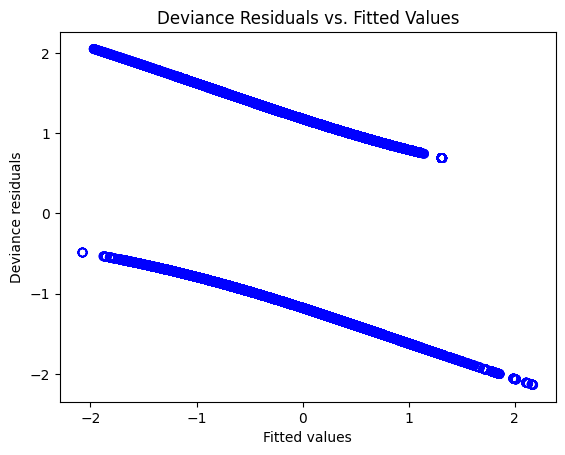

There is a pattern excisting so the data should be treated for SLC


In [8]:
# Plot deviance residuals against predicted values

plt.scatter(model.fittedvalues, model.resid_dev, facecolors='none', edgecolors='b')
plt.xlabel('Fitted values')
plt.ylabel('Deviance residuals')
plt.title('Deviance Residuals vs. Fitted Values')
plt.show()

# In this plot, a pattern or curvature in the residuals might suggest non-linearity
print("There is a pattern excisting so the data should be treated for SLC")

#   2. Independence of Observations:
Observations should be independent of each other. This means that the value
of the dependent variable for one observation should not be influenced by
the values of the dependent variable for other observations.


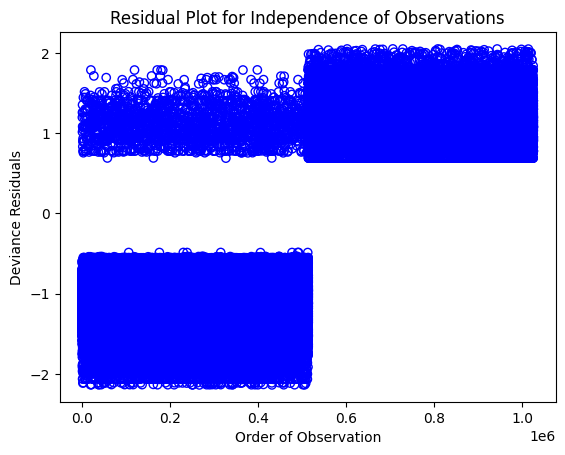

In [9]:
plt.scatter(range(len(model.resid_dev)), model.resid_dev, facecolors='none', edgecolors='b')
plt.xlabel('Order of Observation')
plt.ylabel('Deviance Residuals')
plt.title('Residual Plot for Independence of Observations')
plt.show()

#A random scatter of residuals suggests independence, while patterns may suggest dependencies.

# 3. Absence of Multicollinearity

There should be little to no multicollinearity among the independent variables. Multicollinearity occurs when two or more independent variables are highly correlated, making it difficult to separate their individual effects on the dependent variable.



In [11]:
vif=[]
for i in range(X.shape[1]):
  vif.append(variance_inflation_factor(X.values,i))

pd.DataFrame({"Feature":X.columns,"VIF":vif}).sort_values(by="VIF",ascending=False)


,Feature,VIF
14,age,13.256224
1,AMT_INCOME_TOTAL,6.170903
8,JOB CATEGORY,4.063915
10,STATUS OF LOAN,3.775648
13,OWNS_PROPERTY,3.195439
9,BEGIN_MONTHS,2.952631
15,years_of_experience,2.679668
11,IS_MALE,2.282411
12,OWNS_CAR,2.188178
6,FLAG_PHONE,1.895831


from matplotlib import pyplot as plt
_df_0['VIF'].plot(kind='hist', bins=20, title='VIF')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

INFERENCE : VIF Values are in good range

# 4. OUTLIERS SHOULD BE HANDLED

DATASET CONSIDERED ARE HAVING VERY LESS OUTLIERS

In [16]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,TARGET,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age,years_of_experience
0,5065438,2.0,270000.0,0.0,0.0,1.0,0,0,0,10,-6,6.0,0,0,1,0,36.0,6.0
1,5142753,0.0,81000.0,0.0,1.0,0.0,1,1,0,12,-4,0.0,0,0,0,0,49.0,1.0
2,5111146,0.0,270000.0,1.0,0.0,0.0,0,1,0,8,0,6.0,0,1,1,1,54.0,3.0
3,5010310,1.0,112500.0,0.0,0.0,0.0,0,0,0,3,-3,0.0,0,0,1,1,41.0,5.0
4,5010835,2.0,139500.0,0.0,0.0,0.0,1,0,0,4,-29,0.0,0,1,1,1,47.0,15.0


# <b><i>MODEL BUILDING PROCESS

In [17]:
X=df.drop("TARGET",axis=1)
y=df["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create a logistic regression model
model = LogisticRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# <b><i>GENERAL CLASSIFICATION PERFORMANCE ANALYSIS

#<ul> 1. CONFUSION MATRIX

In [37]:
cm = confusion_matrix(Y_test_pred, y_test)
print("Confusion Matrix:")
cm


Confusion Matrix:


array([[51112, 33098],
       [51302, 69374]])

# <ul> 2. ROC_AUC_CURVE

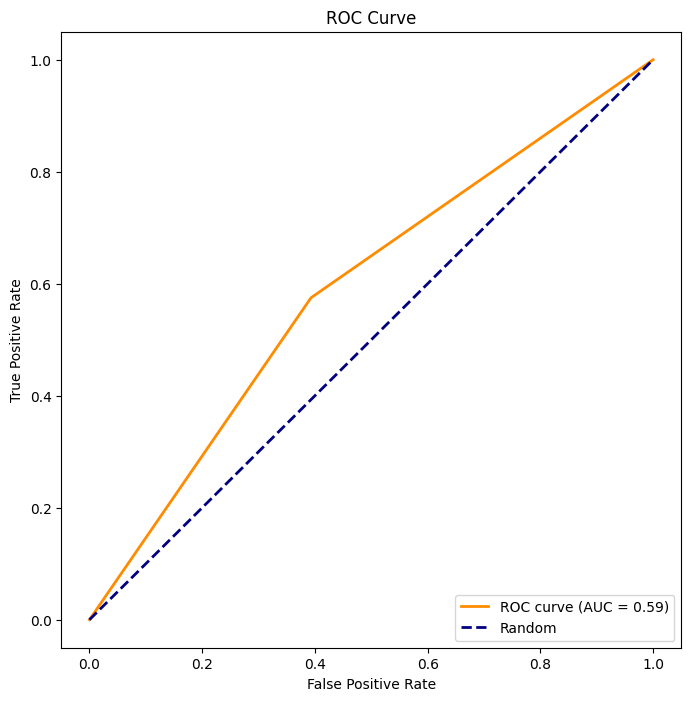

In [32]:
fpr, tpr, thresholds = roc_curve(Y_test_pred, y_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [40]:
print("Classification Report:\n", classification_report(y_test,Y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.50      0.55    102414
           1       0.57      0.68      0.62    102472

    accuracy                           0.59    204886
   macro avg       0.59      0.59      0.58    204886
weighted avg       0.59      0.59      0.58    204886

